<a href="https://colab.research.google.com/github/ikanx101/G-Colab/blob/main/Heart%20Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# set libraries
rm(list=ls())
library(dplyr)
library(keras)
library(tensorflow)
library(caret)

In [45]:
# import data
data = read.csv("https://raw.githubusercontent.com/ikanx101/Live-Session-Nutrifood-R/master/Kaggle%20Data/Heart%20Failure/clinical_records_dataset.csv")
colnames(data) = tolower(colnames(data))

In [46]:
cor(data)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
age,1.00000000,0.08800644,-0.081583900,-0.101012385,0.06009836,0.093288685,-0.05235437,0.159187133,-0.045965841,0.065429524,0.018667868,-0.224068420,0.253728543
anaemia,0.08800644,1.00000000,-0.190741030,-0.012729046,0.03155697,0.038182003,-0.04378555,0.052173604,0.041881610,-0.094768961,-0.107289838,-0.141413982,0.066270098
creatinine_phosphokinase,-0.08158390,-0.19074103,1.000000000,-0.009638514,-0.04407955,-0.070589980,0.02446339,-0.016408480,0.059550156,0.079790629,0.002421235,-0.009345653,0.062728160
diabetes,-0.10101239,-0.01272905,-0.009638514,1.000000000,-0.00485031,-0.012732382,0.09219283,-0.046975315,-0.089550619,-0.157729504,-0.147173413,0.033725509,-0.001942883
ejection_fraction,0.06009836,0.03155697,-0.044079554,-0.004850310,1.00000000,0.024444731,0.07217747,-0.011302475,0.175902282,-0.148385965,-0.067314567,0.041729235,-0.268603312
high_blood_pressure,0.09328868,0.03818200,-0.070589980,-0.012732382,0.02444473,1.000000000,0.04996348,-0.004934525,0.037109470,-0.104614629,-0.055711369,-0.196439479,0.079351058
platelets,-0.05235437,-0.04378555,0.024463389,0.092192828,0.07217747,0.049963481,1.00000000,-0.041198077,0.062124619,-0.125120483,0.028234448,0.010513909,-0.049138868
serum_creatinine,0.15918713,0.05217360,-0.016408480,-0.046975315,-0.01130247,-0.004934525,-0.04119808,1.000000000,-0.189095210,0.006969778,-0.027414135,-0.149315418,0.294277561
serum_sodium,-0.04596584,0.04188161,0.059550156,-0.089550619,0.17590228,0.037109470,0.06212462,-0.189095210,1.000000000,-0.027566123,0.004813195,0.087640000,-0.195203596
sex,0.06542952,-0.09476896,0.079790629,-0.157729504,-0.14838597,-0.104614629,-0.12512048,0.006969778,-0.027566123,1.000000000,0.445891712,-0.015608220,-0.004316376


In [47]:
str(data)
table(data$death_event)

'data.frame':	299 obs. of  13 variables:
 $ age                     : num  75 55 65 50 65 90 75 60 65 80 ...
 $ anaemia                 : int  0 0 0 1 1 1 1 1 0 1 ...
 $ creatinine_phosphokinase: int  582 7861 146 111 160 47 246 315 157 123 ...
 $ diabetes                : int  0 0 0 0 1 0 0 1 0 0 ...
 $ ejection_fraction       : int  20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : int  1 0 0 0 0 1 0 0 0 1 ...
 $ platelets               : num  265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num  1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : int  130 136 129 137 116 132 137 131 138 133 ...
 $ sex                     : int  1 1 1 1 0 1 1 1 0 1 ...
 $ smoking                 : int  0 0 1 0 0 1 0 1 0 1 ...
 $ time                    : int  4 6 7 7 8 8 10 10 10 10 ...
 $ death_event             : int  1 1 1 1 1 1 1 1 1 1 ...



  0   1 
203  96 

In [48]:
save_dulu = data$death_event
data =
  data %>%
  select(-death_event)

preProcess_range_model = preProcess(data, method='range')
data = predict(preProcess_range_model, newdata = data) #variabel targetnya hilang di sini
data$outcome = save_dulu

head(data)
table(data$outcome)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.6363636,0,0.071319214,0,0.09090909,1,0.2908231,0.15730337,0.48571429,1,0,0.000000000,1
2,0.2727273,0,1.000000000,0,0.36363636,0,0.2888326,0.06741573,0.65714286,1,0,0.007117438,1
3,0.4545455,0,0.015692779,0,0.09090909,0,0.1659595,0.08988764,0.45714286,1,1,0.010676157,1
4,0.1818182,1,0.011227354,0,0.09090909,0,0.2241484,0.15730337,0.68571429,1,0,0.010676157,1
5,0.4545455,1,0.017478949,1,0.09090909,0,0.3659838,0.24719101,0.08571429,0,0,0.014234875,1
6,0.9090909,1,0.003062006,0,0.39393939,1,0.2168748,0.17977528,0.54285714,1,1,0.014234875,1



  0   1 
203  96 

In [49]:
# kita pisah pecah dua
data_0 = 
  data %>% 
  filter(outcome == 0)
data_1 = 
  data %>% 
  filter(outcome == 1)

# set minimal n for train data
set.seed(10104074)
n = 65

id_0 = sample(nrow(data_0),n,replace = F)
data_0_1 = data_0[id_0,]
data_0_2 = data_0[-id_0,]

id_1 = sample(nrow(data_1),n,replace = F)
data_1_1 = data_1[id_1,]
data_1_2 = data_1[-id_1,]

# set train and test
train_df = rbind(data_0_1,data_1_1)
test_df = rbind(data_0_2,data_1_2)

# let's see
# train
train_label_raw = train_df$outcome
train_label_clean = to_categorical(train_label_raw)
train_matrix = as.matrix(train_df[-ncol(train_df)])

# test
test_label_raw = test_df$outcome
test_label_clean = to_categorical(test_label_raw)
test_matrix = as.matrix(test_df[-ncol(train_df)])

In [50]:
model = keras_model_sequential()
model %>%
  layer_dense(units = 400,activation = 'relu',
              input_shape = c(ncol(train_matrix))) %>%
  layer_dense(units = 200, activation = 'sigmoid') %>%
  layer_dense(units = 100, activation = 'sigmoid') %>%
  layer_dense(units = 25, activation = 'relu') %>%
  layer_dense(units = 2, activation = 'softmax')

summary(model)

model %>% compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=c('accuracy')
)

Model: "sequential_4"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_24 (Dense)                    (None, 400)                     5200        
________________________________________________________________________________
dense_23 (Dense)                    (None, 200)                     80200       
________________________________________________________________________________
dense_22 (Dense)                    (None, 100)                     20100       
________________________________________________________________________________
dense_21 (Dense)                    (None, 25)                      2525        
________________________________________________________________________________
dense_20 (Dense)                    (None, 2)                       52          
Total params: 108,077
Trainable params: 108,077
Non-trainable params: 0
_______________

In [51]:
fitModel =
  model %>%
  fit(train_matrix,
      train_label_clean,
      epochs = 300,
      batch_size = 100,
      validation_split = 0.15)

`geom_smooth()` using formula 'y ~ x'



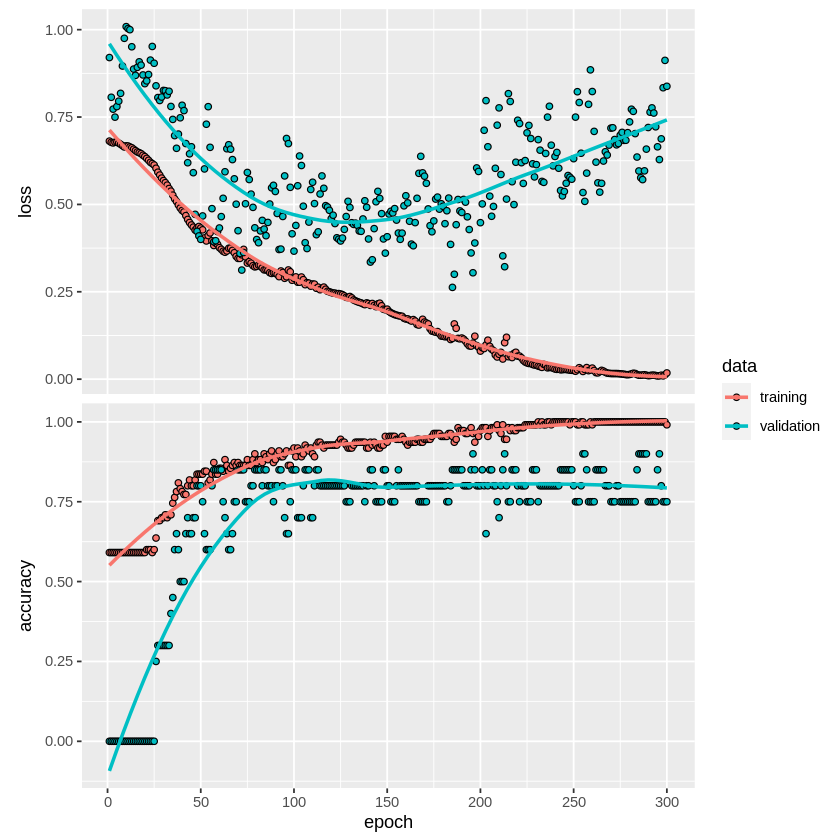

In [52]:
plot(fitModel)

In [53]:
# Pakai train
pred_train = model %>% predict_classes(train_matrix)
table(pred_train,train_label_raw)
mean(train_label_raw == pred_train)

# Pakai test
pred_test = model %>% predict_classes(test_matrix)
table(pred_test,test_label_raw)
mean(test_label_raw == pred_test)

          train_label_raw
pred_train  0  1
         0 65  5
         1  0 60

[1] 0.9615385

         test_label_raw
pred_test   0   1
        0 111   8
        1  27  23

[1] 0.7928994